In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels import regression
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [2]:
QR84_97 = pd.read_csv('QR_84-97.csv', header=0, sep=';', index_col="Dates", parse_dates=True)
CS87_97 = pd.read_csv('CS_87-97.csv', header=0, sep=';', index_col="Dates", parse_dates=True).dropna()
WI87_96 = pd.read_csv('WI_87-96.csv', header=0, sep=';', index_col="Dates", parse_dates=True)
AGE84_97 = pd.read_csv('AGE_84-97.csv', header=0, sep=';', index_col="Dates", parse_dates=True)
RJS84_97 = pd.read_csv('RJS_84-97.csv', header=0, sep=';', index_col="Dates", parse_dates=True)

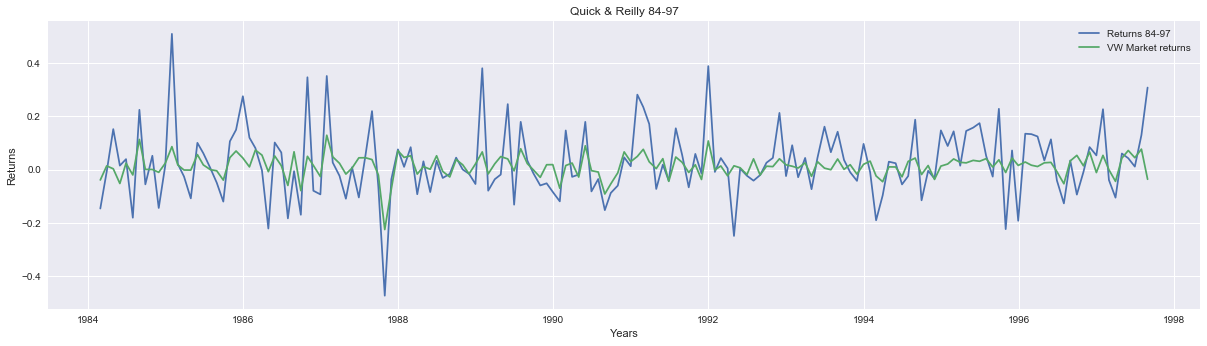

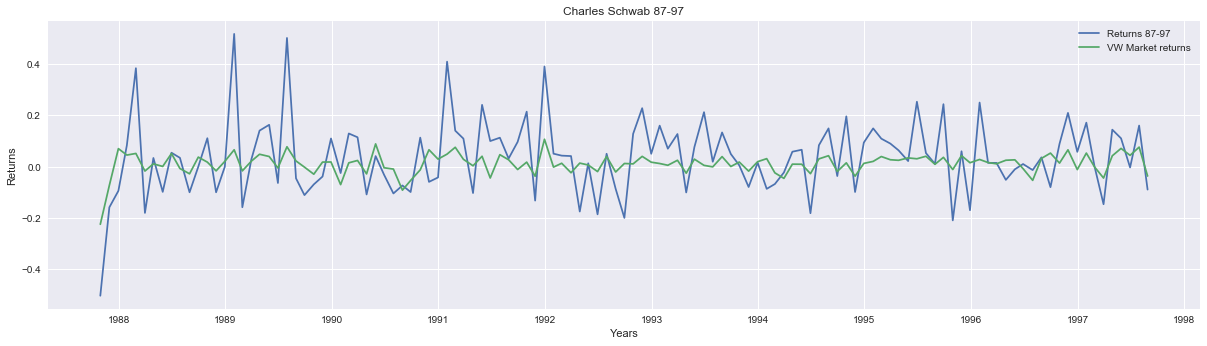

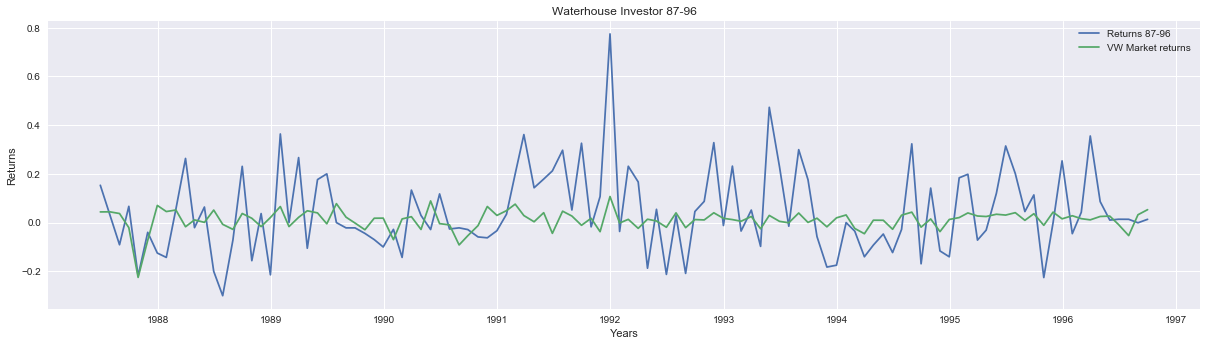

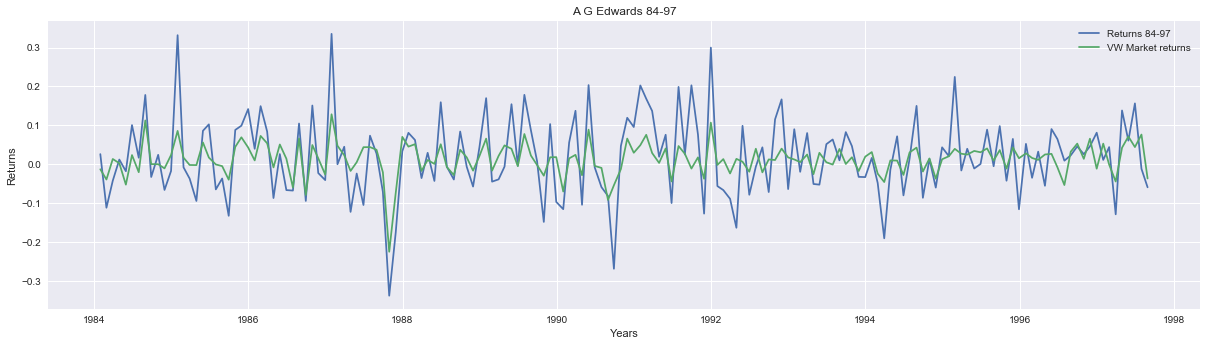

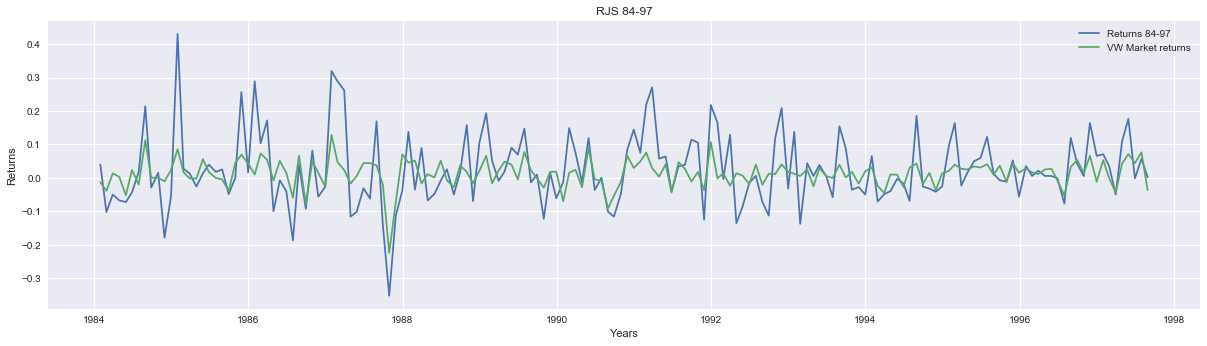

In [3]:
QR84_97LP = plt.figure(figsize=(20,5))
axes = QR84_97LP.add_axes([0.1, 0.1, 0.8, 0.8])
axes.set_xlabel('Years')
axes.set_ylabel('Returns')
axes.set_title('Quick & Reilly 84-97')
axes.plot(QR84_97['Returns 84-97'], label='Returns 84-97')
axes.plot(QR84_97['VW mrkt returns '], label='VW Market returns')
axes.autoscale()
axes.legend()

CS87_97LP = plt.figure(figsize=(20,5))
axes = CS87_97LP.add_axes([0.1, 0.1, 0.8, 0.8])
axes.set_xlabel('Years')
axes.set_ylabel('Returns')
axes.set_title('Charles Schwab 87-97')
axes.plot(CS87_97['Returns 87-97'], label='Returns 87-97')
axes.plot(CS87_97['VW mrkt returns'], label='VW Market returns')
axes.autoscale()
axes.legend()

WI87_96LP = plt.figure(figsize=(20,5))
axes = WI87_96LP.add_axes([0.1, 0.1, 0.8, 0.8])
axes.set_xlabel('Years')
axes.set_ylabel('Returns')
axes.set_title('Waterhouse Investor 87-96')
axes.plot(WI87_96['Returns 87-96'], label='Returns 87-96')
axes.plot(WI87_96['VW mrkt returns'], label='VW Market returns')
axes.autoscale()
axes.legend()

AGE84_97LP = plt.figure(figsize=(20,5))
axes = AGE84_97LP.add_axes([0.1, 0.1, 0.8, 0.8])
axes.set_xlabel('Years')
axes.set_ylabel('Returns')
axes.set_title('A G Edwards 84-97')
axes.plot(AGE84_97['Returns 84-97'], label='Returns 84-97')
axes.plot(AGE84_97['VW Market returns'], label='VW Market returns')
axes.autoscale()
axes.legend()

RJS84_97LP = plt.figure(figsize=(20,5))
axes = RJS84_97LP.add_axes([0.1, 0.1, 0.8, 0.8])
axes.set_xlabel('Years')
axes.set_ylabel('Returns')
axes.set_title('RJS 84-97')
axes.plot(RJS84_97['Returns 84-97'], label='Returns 84-97')
axes.plot(RJS84_97['VW Market returns'], label='VW Market returns')
axes.autoscale()
axes.legend()

In [4]:
def UnleveredBeta (x,y):
    return x / (1 + ((1 - 0.3547) * y))

def CAPM(rf, rm):
    return rf + Beta * (rm - rf)
# rf = 0.0634
# rm = 0.178

In [5]:
X = QR84_97['VW mrkt returns ']
Y = QR84_97['Returns 84-97']
X1 = sm.add_constant(X)
model = sm.OLS(Y, X1).fit()
Alpha, Beta, RSquared = model.params[0], model.params[1], model.rsquared
results = {'Beta': Beta, 'RSquared': RSquared}
RESULTS = pd.DataFrame(data=results, index=['Quick & Reilly'])

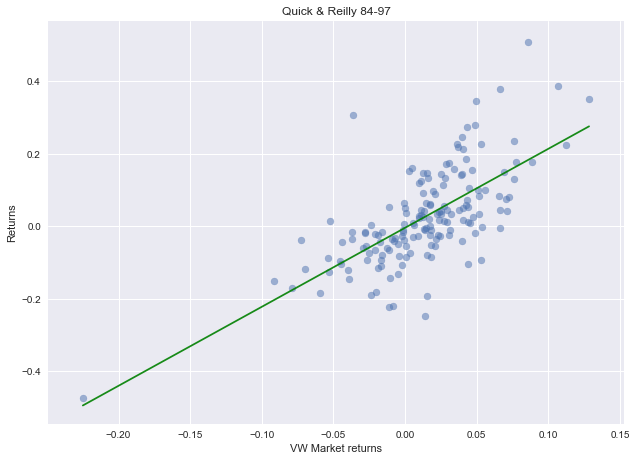

In [6]:
X2 = np.linspace(X.min(), X.max(), 100)
Y_hat = X2 * Beta + Alpha

QR84_97SP = plt.figure(figsize=(10,7))
axes = QR84_97SP.add_axes([0.1, 0.1, 0.8, 0.8])
axes.scatter(X, Y, alpha=0.5)
axes.set_xlabel('VW Market returns')
axes.set_ylabel('Returns')
axes.set_title('Quick & Reilly 84-97')
axes.plot(X2, Y_hat, alpha=0.9, color='green')
axes.autoscale()
# QR84_97SP.savefig('QR84_97SP', dpi=1080)

In [7]:
X = CS87_97['VW mrkt returns']
Y = CS87_97['Returns 87-97']
X1 = sm.add_constant(X)
model = sm.OLS(Y, X1).fit()
Alpha, Beta, RSquared = model.params[0], model.params[1], model.rsquared
results = {'Beta': Beta, 'RSquared': RSquared}
RESULTS = pd.DataFrame(data=results, index=['Charles Schwab'])

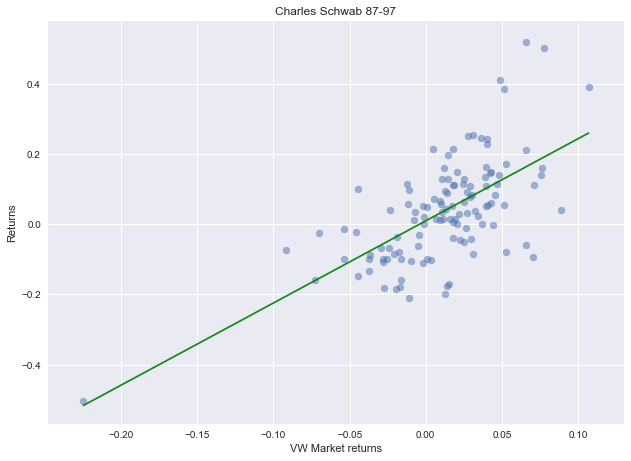

In [8]:
X2 = np.linspace(X.min(), X.max(), 100)
Y_hat = X2 * Beta + Alpha

CS87_97SP = plt.figure(figsize=(10,7))
axes = CS87_97SP.add_axes([0.1, 0.1, 0.8, 0.8])
axes.scatter(X, Y, alpha=0.5)
axes.set_xlabel('VW Market returns')
axes.set_ylabel('Returns')
axes.set_title('Charles Schwab 87-97')
axes.plot(X2, Y_hat, alpha=0.9, color='green')
axes.autoscale()
# CS87_97SP.savefig('CS87_97SP', dpi=1080)

In [9]:
X = WI87_96['VW mrkt returns']
Y = WI87_96['Returns 87-96']
X1 = sm.add_constant(X)
model = sm.OLS(Y, X1).fit()
Alpha, Beta, RSquared = model.params[0], model.params[1], model.rsquared
results = {'Beta': Beta, 'RSquared': RSquared}
RESULTS = pd.DataFrame(data=results, index=['Waterhouse Investor'])

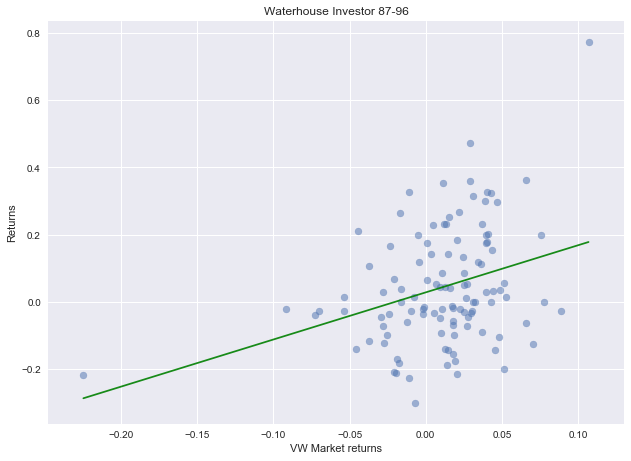

In [10]:
X2 = np.linspace(X.min(), X.max(), 100)
Y_hat = X2 * Beta + Alpha

WI87_96SP = plt.figure(figsize=(10,7))
axes = WI87_96SP.add_axes([0.1, 0.1, 0.8, 0.8])
axes.scatter(X, Y, alpha=0.5)
axes.set_xlabel('VW Market returns')
axes.set_ylabel('Returns')
axes.set_title('Waterhouse Investor 87-96')
axes.plot(X2, Y_hat, alpha=0.9, color='green')
axes.autoscale()
# WI87_96SP.savefig('WI87_96SP', dpi=1080)

In [11]:
X = AGE84_97['VW Market returns']
Y = AGE84_97['Returns 84-97']
X1 = sm.add_constant(X)
model = sm.OLS(Y, X1).fit()
Alpha, Beta, RSquared = model.params[0], model.params[1], model.rsquared
results = {'Beta': Beta, 'RSquared': RSquared}
RESULTS = pd.DataFrame(data=results, index=['AG Edwards'])

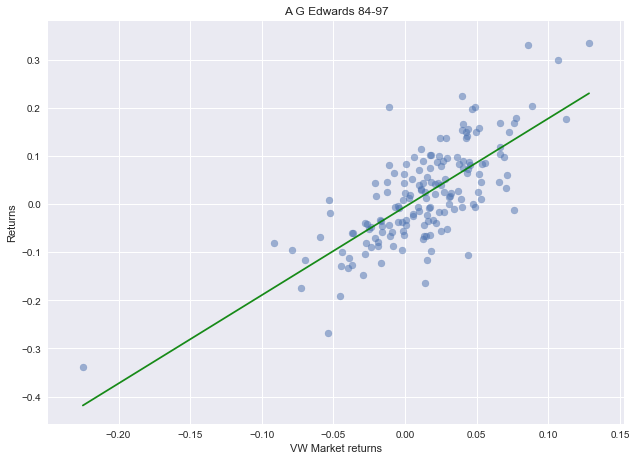

In [12]:
X2 = np.linspace(X.min(), X.max(), 100)
Y_hat = X2 * Beta + Alpha

AGE84_97SP = plt.figure(figsize=(10,7))
axes = AGE84_97SP.add_axes([0.1, 0.1, 0.8, 0.8])
axes.scatter(X, Y, alpha=0.5)
axes.set_xlabel('VW Market returns')
axes.set_ylabel('Returns')
axes.set_title('A G Edwards 84-97')
axes.plot(X2, Y_hat, alpha=0.9, color='green')
# AGE84_97SP.savefig('AGE84_97SP', dpi=1080)

In [13]:
X = RJS84_97['VW Market returns']
Y = RJS84_97['Returns 84-97']
X1 = sm.add_constant(X)
model = sm.OLS(Y, X1).fit()
Alpha, Beta, RSquared = model.params[0], model.params[1], model.rsquared
results = {'Beta': Beta, 'RSquared': RSquared}
RESULTS = pd.DataFrame(data=results, index=['RJS'])

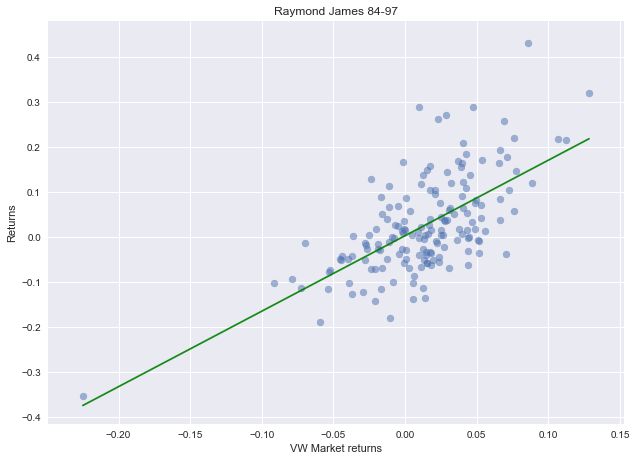

In [14]:
X2 = np.linspace(X.min(), X.max(), 100)
Y_hat = X2 * Beta + Alpha

RJS84_97SP = plt.figure(figsize=(10,7))
axes = RJS84_97SP.add_axes([0.1, 0.1, 0.8, 0.8])
axes.scatter(X, Y, alpha=0.5)
axes.set_xlabel('VW Market returns')
axes.set_ylabel('Returns')
axes.set_title('Raymond James 84-97')
axes.plot(X2, Y_hat, alpha=0.9, color='green')
axes.autoscale()
# RJS84_97SP.savefig('RJS84_97SP', dpi=1080)